Predecting the Google Stock price for the month of Jan 2017 based on the information gathered from the previous 5 years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set = df_train.iloc[:, 1:2].values

In [4]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## PART 1: Data Preprocessing

In [5]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
# Creating a data structure with 60 timeseps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i - 60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [9]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [10]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## PART 2: Building the RNN

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [13]:
# Initializing the RNN
regressor = Sequential()

In [14]:
# First LSTM layer and Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
# Second LSTM layer and Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
# Third LSTM layer and Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# Fourth LSTM layer and Dropout Regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
# Adding the Output Layer
regressor.add(Dense(units = 1))

In [19]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
# Fitting the RNN to the Training Set
regressor.fit(x = X_train, y = y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0357
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0057
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0062
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

## PART 3: Predictions and Visualization

In [21]:
# Getting the real stock price of 2017
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:, 1:2].values

In [22]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [24]:
# Getting the predicted stock price of 2017
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
  X_test.append(inputs[i - 60:i, 0])

X_test = np.array(X_test)
# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [25]:
predicted_stock_price

array([[791.9676 ],
       [788.8904 ],
       [788.89374],
       [790.5605 ],
       [794.2468 ],
       [800.4482 ],
       [806.2498 ],
       [808.6495 ],
       [808.75287],
       [808.2629 ],
       [808.064  ],
       [808.06836],
       [808.1013 ],
       [808.6502 ],
       [809.5384 ],
       [814.0199 ],
       [821.2478 ],
       [829.1754 ],
       [833.54254],
       [829.1847 ]], dtype=float32)

### Visualizing the results

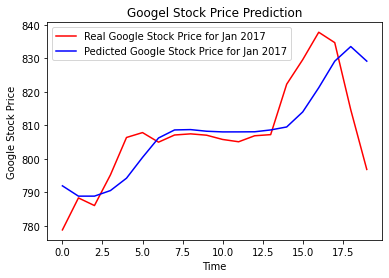

In [27]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price for Jan 2017')
plt.plot(predicted_stock_price, color = 'blue', label = 'Pedicted Google Stock Price for Jan 2017')
plt.title('Googel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In the parts of the predictions containing some spikes, our model cannot react to fast, non-linear changes. But for the parts with the smooth changes, the model reacts robustly. 